## 这是一份有关销售数据的简单数据分析报告

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
columns=["user_id","order_dt","order_product","order_amount"]

df=pd.read_csv('CDNOW_master.txt',names=columns,sep='\s+')
df.head()

,user_id,order_dt,order_product,order_amount
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


- user_id：用户ID
- order_dt：购买日期
- order_products：购买产品数
- order_amount：购买金额

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        69659 non-null  int64  
 1   order_dt       69659 non-null  int64  
 2   order_product  69659 non-null  int64  
 3   order_amount   69659 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


In [4]:
df.describe()

,user_id,order_dt,order_product,order_amount
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


- 大部分订单只有1-3的销量，平均值为2.4，且有一定的极大值干扰
- 用户消费金额比较稳定，平均数在35，中位数在25，有一定极值干扰


In [5]:
# 根据上文可以得知，order_dt是int64形式，想把他转换成时间的形式。
# 有两种方法：

#1.df=pd.read_csv('CDNOW_master.txt',names=columns,sep='\s+'，parse_dates=["order_dt"])


#2.第二种方法，用to_datetime()函数

df['order_dt']=pd.to_datetime(df.order_dt,format="%Y%m%d")#Y-四位年份，m/d-两位月/日
df['month']=df.order_dt.values.astype('datetime64[M]')


In [6]:
df

,user_id,order_dt,order_product,order_amount,month
0,1,1997-01-01,1,11.77,1997-01-01
1,2,1997-01-12,1,12.00,1997-01-01
2,2,1997-01-12,5,77.00,1997-01-01
3,3,1997-01-02,2,20.76,1997-01-01
4,3,1997-03-30,2,20.76,1997-03-01
...,...,...,...,...,...
69654,23568,1997-04-05,4,83.74,1997-04-01
69655,23568,1997-04-22,1,14.99,1997-04-01
69656,23569,1997-03-25,2,25.74,1997-03-01
69657,23570,1997-03-25,3,51.12,1997-03-01


# 1.进行用户消费趋势的分析（按月）
- 每月的消费总金额
- 每月的消费次数
- 每月的产品购买量
- 每月的消费人数

### 每月的消费总金额

In [7]:
order_month_amount=df.groupby("month").order_amount.sum()

order_month_amount.head()

month
1997-01-01    299060.17
1997-02-01    379590.03
1997-03-01    393155.27
1997-04-01    142824.49
1997-05-01    107933.30
Name: order_amount, dtype: float64

In [8]:
# 数据可视化

import matplotlib.pyplot as plt

%matplotlib inline

# 更改设计风格
plt.style.use("ggplot")

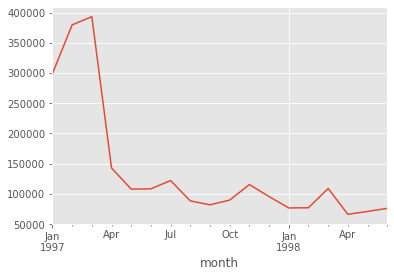

In [9]:
order_month_amount.plot()

由上图可知，消费金额在前三个月达到最高峰，后续消费较为稳定，有轻微下降趋势


### 每个月的订单数

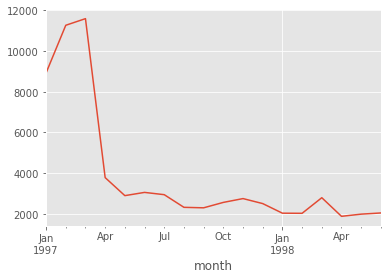

In [10]:

grouped_month=df.groupby("month")
grouped_month.user_id.count().plot()

前三个月的订单数在10000笔左右，后续月份的平均消费人数则在2500人

### 每月的产品购买量


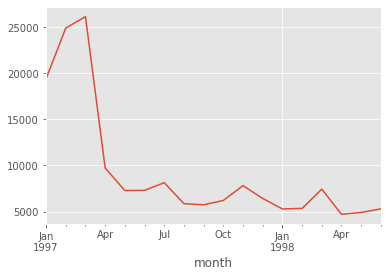

In [11]:
grouped_month.order_product.sum().plot()

### 每月的消费人数

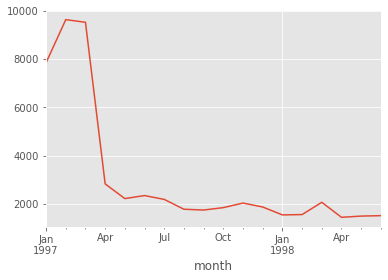

In [12]:
grouped_month.user_id.apply(lambda x:len(x.drop_duplicates())).plot()

每月消费人数低于每月消费次数，但是差异不大

前三个月每月的消费人数在8000-10000之间，后续月份断崖式下降，平均消费人数在2000人不到

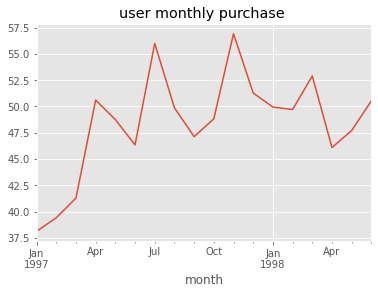

In [13]:
#每月用户消费的平均金额= 每月消费总金额/ 消费人数

user_monthly_purhcase=grouped_month.order_amount.sum()/grouped_month.user_id.apply(lambda x:len(x.drop_duplicates()))
user_monthly_purhcase.plot(title="user monthly purchase ")

In [14]:
df.pivot_table(index="month",
              values=["order_product","order_amount","user_id"],
              aggfunc={"order_product":"sum",
                      "order_amount":"sum",
                      "user_id":"count"})

,order_amount,order_product,user_id
month,,,
1997-01-01,299060.17,19416,8928
1997-02-01,379590.03,24921,11272
1997-03-01,393155.27,26159,11598
1997-04-01,142824.49,9729,3781
1997-05-01,107933.30,7275,2895
1997-06-01,108395.87,7301,3054
1997-07-01,122078.88,8131,2942
1997-08-01,88367.69,5851,2320
1997-09-01,81948.80,5729,2296


# 2.用户个体消费分析
- 用户消费金额、消费次数的描述统计
- 用户消费金额和消费次数的散点图
- 用户消费金额的分布图
- 用户消费次数的分布图
- 用户累计消费金额占比


In [15]:
# 用户消费金额，消费次数的描述统计

grouped_user=df.groupby("user_id")

In [16]:
grouped_user.sum().describe()

,order_product,order_amount
count,23570.000000,23570.000000
mean,7.122656,106.080426
std,16.983531,240.925195
min,1.000000,0.000000
25%,1.000000,19.970000
50%,3.000000,43.395000
75%,7.000000,106.475000
max,1033.000000,13990.930000


- 用户平均购买了7张CD，但是中位值只有3，说明小部分用户购买了大多数的CD
- 用户平均消费106元，中位值有43，判断同上，有极值干扰
- 观察数据,从用户ID看，每位用户平均购买7张CD，最多的用户购买了1033张，属于狂热用户了(观察异常值)。用户的平均消费金额（客单价）106元，标准差是240，结合分位数和最大值看，平均值略大于第三分位数，肯定存在小部分的高额消费用户


In [17]:
# 查找极端值： 发现order_amount是4000以上的比较少，算是极端值，在画散点图的时候可以去掉
grouped_user.sum().sort_values(by="order_product", ascending=False).head(20)

,order_product,order_amount
user_id,,
14048,1033,8976.33
7592,917,13990.93
7983,536,6973.07
7931,514,6497.18
19339,378,6552.70
22279,330,4490.64
499,328,4378.55
6569,322,4968.00
3049,301,4262.85


Text(0.5, 1.0, 'scatter char of user purchase amount and purchase times')

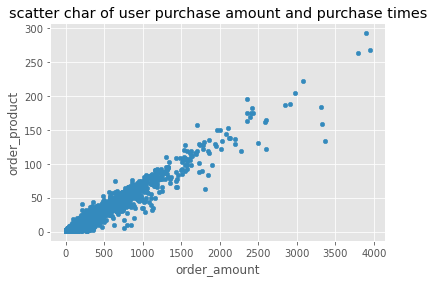

In [18]:
# 用户消费金额和消费次数的散点图: 散点图对极端值比较敏感

grouped_user.sum().query('order_amount<4000').plot.scatter(x='order_amount',y='order_product')
plt.title("scatter char of user purchase amount and purchase times")


# query（）函数很像sql里面的where()

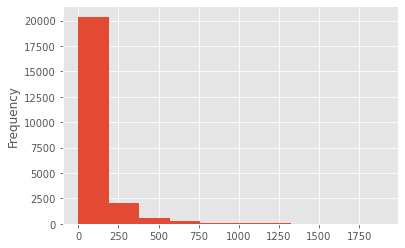

In [19]:
#用户消费金额的分布图
grouped_user.sum().query("order_product<100").order_amount.plot.hist()
#grouped_user.sum().query("order_product<100")["order_amount"].plot.hist(bins=20)
# plt.title("hist char of user purchase amount")


从直方图可以得知，用户消费金额，绝大部分呈现集中趋势，小部分异常值干扰了判断。就是说大部分

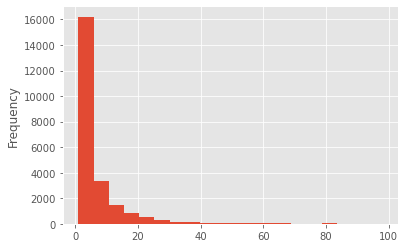

In [20]:
# 用户消费次数的分布图

grouped_user.sum().query("order_product<100")["order_product"].plot.hist(bins=20)

切比雪夫定理表明：95%的数据都分布在mean+-5个标准差的范围内，

mean是7， 标准差是17， 7+17*5=102，所以就过滤掉order_product>100的

In [21]:
# 用户累计消费金额占比
user_cumsum=grouped_user.sum().sort_values('order_amount').apply(lambda x:x.cumsum()/x.sum())

user_cumsum

,order_product,order_amount
user_id,,
10175,0.000006,0.000000
4559,0.000012,0.000000
1948,0.000018,0.000000
925,0.000024,0.000000
10798,0.000030,0.000000
...,...,...
7931,0.982940,0.985405
19339,0.985192,0.988025
7983,0.988385,0.990814


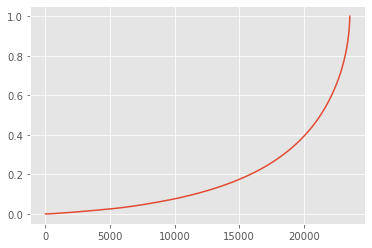

In [22]:
user_cumsum.reset_index().order_amount.plot()

50%的用户只贡献了15%的消费额度，而排名前5000（20000-25000的那部分）的用户则贡献了60%的消费额

# 3.用户行为分析
- 用户第一次消费
- 用户最后一次消费
- 新老客户消费比
   - 多少客户仅消费了一次
   - 每月新客占比
- 用户分层
  - RFM用户分层
  - 用户状态分析：注册、活跃、回流、流失（不活跃）
- 用户购买周期（按订单）
  - 用户消费周期描述
  - 用户消费周期分布
- 用户生命周期（按第一次&最后一次消费）
  - 用户生命周期描述
  - 用户生命周期分布


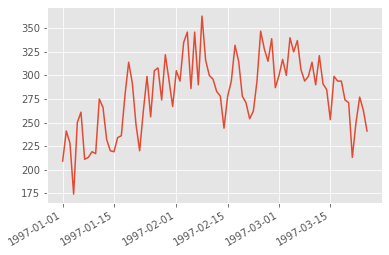

In [23]:
# 用户第一次消费的时间

grouped_user.order_dt.min().value_counts()   # 先算出来用户第一次消费的时间,最小的时间肯定最久远，这样就是客户第一次消费的时间

# 然后再画图
grouped_user.order_dt.min().value_counts().plot()

- 可以看到，所有用户的首购时间都集中在97年的1月1日到97年的3月31日。
- 2月上旬之前，首次购买用户的数量一致在稳定上升，在2.10日左右首购客户的数量产生“W”型剧烈的波动，在2月下旬开始稳定。 
- 然后一直到三月下旬都体现稳定下跌的状态。

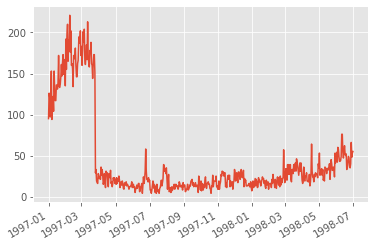

In [24]:
# 用户最后一次消费的时间：与客户的流失是息息相关的

grouped_user.order_dt.max().value_counts()  # 先算出来用户第一次消费的时间
# 然后再画图
grouped_user.order_dt.max().value_counts().plot()

- 大部分客户的最后一次购买集中在前三个月。说明前三个月涌入的大量用户只购买了第一次后就不再购买了，有可能是网站在这个期间进行了推广，吸引了客户
- 由于产品的特性，CD不属于一次性类消费品，属于中低频次，购买周期长；随着时间的递增，客户的流失率会增加，如果新增用户少，流失会更明显；
- 所以，此类网站的流失不是主要核心指标，吸引新客户和首购才是最核心的目标

### 新老客户消费对比

In [25]:
# 1.找出客户
user_life=grouped_user.order_dt.agg(["min","max"])
user_life

,min,max
user_id,,
1,1997-01-01,1997-01-01
2,1997-01-12,1997-01-12
3,1997-01-02,1998-05-28
4,1997-01-01,1997-12-12
5,1997-01-01,1998-01-03
...,...,...
23566,1997-03-25,1997-03-25
23567,1997-03-25,1997-03-25
23568,1997-03-25,1997-04-22


In [26]:
user_life_rate=(user_life["min"]==user_life["max"]).value_counts()
user_life_rate

True     12054
False    11516
dtype: int64

In [27]:
#显示小数点后的两位：{：.2%}
print("仅消费一次的用户占比{:.2%}".format(user_life_rate[1]/user_life.shape[0]))
#不显示小数位：{：.0%}
print("仅消费一次的用户占比{:.0%}".format(user_life_rate[1]/user_life.shape[0]))
#仅显示小数点后的一位：{：.1%}:
print("仅消费一次的用户占比{:.1%}".format(user_life_rate[1]/user_life.shape[0]))


仅消费一次的用户占比51.14%
仅消费一次的用户占比51%
仅消费一次的用户占比51.1%


In [28]:
# 方法2： 格式化为float, 然后处理成% 格式{：.2f}%
print("仅消费一次的用户占比{:.2f}%".format(user_life_rate[1]/user_life.shape[0]*100))

仅消费一次的用户占比51.14%


In [29]:
user_life_rate[1]

12054

In [30]:
user_life.shape

(23570, 2)

## 每月新客户占比：

In [31]:
#按月份和用户ID分组：
grouped_month_user=df.groupby(["month","user_id"])

# 用当月用户订单日期最小值与用户订单日期最小值联结,这个的目的主要是做出来一个既有当月用户订单日期最小值{min},又有order_date的一个dataframe：
tmp=grouped_month_user.order_dt.agg(["min"]).join(grouped_user.order_dt.min())

#判断用户当月订单的最小值是否与用户订单最小值相等，结果的值返回新建字段new
tmp['new']=(tmp['min']==tmp.order_dt)
tmp

min   order_dt    new
month      user_id                             
1997-01-01 1       1997-01-01 1997-01-01   True
           2       1997-01-12 1997-01-12   True
           3       1997-01-02 1997-01-02   True
           4       1997-01-01 1997-01-01   True
           5       1997-01-01 1997-01-01   True
...                       ...        ...    ...
1998-06-01 23444   1998-06-28 1997-03-25  False
           23489   1998-06-21 1997-03-25  False
           23513   1998-06-14 1997-03-25  False
           23555   1998-06-10 1997-03-25  False
           23556   1998-06-07 1997-03-25  False

[55379 rows x 3 columns]

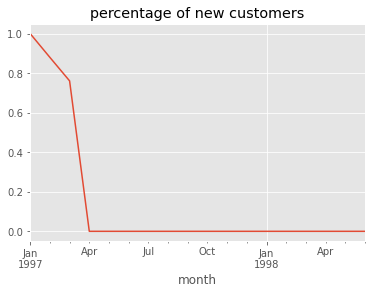

In [32]:
# 作新客占比的折线图

tmp.reset_index().groupby("month").new.apply(lambda x:x.sum()/x.count()).plot(title="percentage of new customers")

- 可以看出，只有前三个月的新客占比不为零，后续月份新客占比百分比为零;
- 这说明只有前三个月有新用户的增加，后续月份消费的用户是前三个月加入的老客户，并没有新客户的加入



## RFM用户分层


- RFM模型（最近一次消费、消费频率、消费金额）。

通过透视表获取用户RFM相关维度的信息：把user_id作为索引，根据order_amount和order_dt的值，算出每个用户最大购买日期（最后一次消费的日期）、总消费金额，以及总消费次数.


In [33]:
rfm=df.pivot_table(index="user_id",
                   values=["order_product","order_amount","order_dt"],
                  aggfunc={"order_dt":"max",
                          "order_amount":"sum",
                          "order_product":"sum"})

rfm.head()

,order_amount,order_dt,order_product
user_id,,,
1,11.77,1997-01-01,1
2,89.00,1997-01-12,6
3,156.46,1998-05-28,16
4,100.50,1997-12-12,7
5,385.61,1998-01-03,29


- R：消费最后一次消费时间的度量，数值越小越好
- F：消费的总商品数，数值越大越好
- M：消费的总金额，数值越大越好

In [34]:
# 计算每位用户最后一次消费时间与全部用户最后一次消费时间的差值

# /np.timedelta64(1,'D')的作用是：消除单位名，进行重命名

rfm["R"]=(rfm.order_dt.max()-rfm.order_dt)/np.timedelta64(1,"D")
rfm.rename(columns={"order_product":"F","order_amount":"M"},inplace=True)
rfm.head()

,M,order_dt,F,R
user_id,,,,
1,11.77,1997-01-01,1,545.0
2,89.00,1997-01-12,6,534.0
3,156.46,1998-05-28,16,33.0
4,100.50,1997-12-12,7,200.0
5,385.61,1998-01-03,29,178.0


In [35]:
#应用匿名函数,判断每一行值与平均值大小关系

rfm[["R","F","M"]].apply(lambda x:x-x.mean()).head()

,R,F,M
user_id,,,
1,177.778362,-6.122656,-94.310426
2,166.778362,-1.122656,-17.080426
3,-334.221638,8.877344,50.379574
4,-167.221638,-0.122656,-5.580426
5,-189.221638,21.877344,279.529574


In [36]:
# 客户层次的定义，RFM得分可以根据业务定义打分，按照r,f,m这三个维度取平均，把每个维度高于平均值的标记为1，低于平均值的标记为0.

def rfm_func(x):
    level=x.apply(lambda x:"1" if x>=0 else "0")
    
    #字符串拼接
    #111： R>0，是距离平均消费的时间要久，R越大，说明没有消费的时间越久，F>0: 说明是消费次数比较高的，重要价值客户，以此类推。
    label=level.R+level.F+level.M
    
    d={
        "111":"重要价值客户",
        "011":"重要保持客户",
        "101":"重要挽留客户",
        "001":"重要发展客户",
        "110":"一般价值客户",
        "010":"一般保持客户",
        "100":"一般挽留客户",
        "000":"一般发展客户"
    }
    
    result=d[label]
    return result

# x-x.mean(): 具体真实情况可以修改，不一定需要用均值。 切比雪夫也可以>200 极值人工处理掉

rfm["label"]=rfm[["R","F","M"]].apply(lambda x:x-x.mean()).apply(rfm_func,axis=1)
rfm

,M,order_dt,F,R,label
user_id,,,,,
1,11.77,1997-01-01,1,545.0,一般挽留客户
2,89.00,1997-01-12,6,534.0,一般挽留客户
3,156.46,1998-05-28,16,33.0,重要保持客户
4,100.50,1997-12-12,7,200.0,一般发展客户
5,385.61,1998-01-03,29,178.0,重要保持客户
...,...,...,...,...,...
23566,36.00,1997-03-25,2,462.0,一般挽留客户
23567,20.97,1997-03-25,1,462.0,一般挽留客户
23568,121.70,1997-04-22,6,434.0,重要挽留客户


In [37]:
# 计算每层客户R，F，M的和
rfm.groupby("label").sum()

,M,F,R
label,,,
一般价值客户,7181.28,650,36295.0
一般保持客户,19937.45,1712,29448.0
一般发展客户,196971.23,13977,591108.0
一般挽留客户,438291.81,29346,6951815.0
重要价值客户,167080.83,11121,358363.0
重要保持客户,1592039.62,107789,517267.0
重要发展客户,45785.01,2023,56636.0
重要挽留客户,33028.40,1263,114482.0


由此可以看出，【重要保持客户】对于消费总金额的占比远远大于其他客户的占比，这说明绝大部分的收益是由【重要保持客户】get_ipython献的，只要能保证这部分客户不流失，那么公司的收益将会得到有力的保障

In [38]:
rfm.groupby("label").count()

,M,order_dt,F,R
label,,,,
一般价值客户,77,77,77,77
一般保持客户,206,206,206,206
一般发展客户,3300,3300,3300,3300
一般挽留客户,14074,14074,14074,14074
重要价值客户,787,787,787,787
重要保持客户,4554,4554,4554,4554
重要发展客户,331,331,331,331
重要挽留客户,241,241,241,241


下面是scatter plot和pie chart两种绘图方法

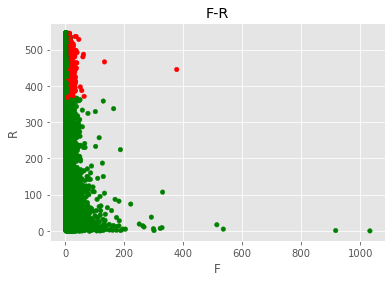

In [39]:
#方法1：scatterplot

#增加字段color，为下面的图做准备：

rfm.loc[rfm.label=="重要价值客户","color"]="r"

rfm.loc[rfm.label!="重要价值客户","color"]="g"

rfm.plot(kind="scatter",x="F",y="R",c=rfm.color,title="F-R")

In [40]:
rfm

,M,order_dt,F,R,label,color
user_id,,,,,,
1,11.77,1997-01-01,1,545.0,一般挽留客户,g
2,89.00,1997-01-12,6,534.0,一般挽留客户,g
3,156.46,1998-05-28,16,33.0,重要保持客户,g
4,100.50,1997-12-12,7,200.0,一般发展客户,g
5,385.61,1998-01-03,29,178.0,重要保持客户,g
...,...,...,...,...,...,...
23566,36.00,1997-03-25,2,462.0,一般挽留客户,g
23567,20.97,1997-03-25,1,462.0,一般挽留客户,g
23568,121.70,1997-04-22,6,434.0,重要挽留客户,g


- R（最近消费）与F（消费次数）的散点图，可以看到重要价值客户的R大F小，表示消费次数多且消费时间近。

- 从RFM分层可知，大部分用户为重要保持客户，但是这是由于极值的影响，所以RFM的划分标准应该以业务为准

- 尽量用小部分的用户覆盖大部分的份额
- 不要为了数据好看划分等级

In [41]:
rfm_count=rfm.groupby("label").count()["R"]
rfm_count

label
一般价值客户       77
一般保持客户      206
一般发展客户     3300
一般挽留客户    14074
重要价值客户      787
重要保持客户     4554
重要发展客户      331
重要挽留客户      241
Name: R, dtype: int64

C:\Users\cryst\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 19968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\cryst\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 33324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\cryst\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 20215 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\cryst\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 20540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\cryst\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 23458 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\cryst\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 25143 missing from c

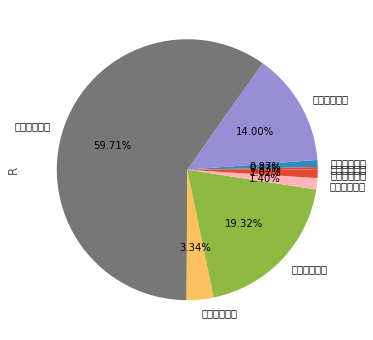

In [42]:
plt.figure(figsize=(6,6))
rfm_count.plot(kind="pie",
               autopct="%2.2f%%",
               labels=rfm_count.index)

- 由图可知，一般发展客户占到59.53%
- 重要价值客户占比第二，为17.33%,其次是一般挽留客户，占比11%
- 一般保持和重要保持客户占比较低

In [43]:
# 做pivot table, 计算客户每个月的消费数据


pivoted_counts=df.pivot_table(index="user_id",
                             columns="month",
                             values="order_dt",
                             aggfunc="count").fillna(0)
pivoted_counts

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23567,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23568,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 以上透视表记录了每位用户每月消费次数的记录，是一份消费明细表


In [44]:
# 当每月有消费时记录为1，没有1消费时记录为0

df_purchase=pivoted_counts.applymap(lambda x: 1 if x>0 else 0)
df_purchase

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23567,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23568,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:
# 定义columns_month
columns_month=df.groupby('month').sum().reset_index().month
#columns_month=df.groupby("month").sum().reset_index().loc[:,"month"]

columns_month

0    1997-01-01
1    1997-02-01
2    1997-03-01
3    1997-04-01
4    1997-05-01
5    1997-06-01
6    1997-07-01
7    1997-08-01
8    1997-09-01
9    1997-10-01
10   1997-11-01
11   1997-12-01
12   1998-01-01
13   1998-02-01
14   1998-03-01
15   1998-04-01
16   1998-05-01
17   1998-06-01
Name: month, dtype: datetime64[ns]

将用户状态分为unreg（未注册）、new（新客）、active（活跃用户）return（回流用户）和unactive（不活跃用户）：


In [46]:
def active_status(data):
    status = []
    x = len(data)
    for i in range(x):
        #未消费
        if data[i] == 0:
            if len(status) == 0:
                status.append('unreg')
            else:
                if status[i-1] == 'unreg':
                    status.append('unreg')
                else:
                    status.append('unactive')
        #消费过
        else:
            if len(status) == 0:
                status.append('new')
            else:
                if status[i-1] == 'unreg':
                    status.append('new')
                elif status[i-1] == 'unactive':
                    status.append('return')
                else:
                    status.append('active')
    return status           

- 函数编写思路：

- 若本月没有消费

- 若之前是未注册，则依旧为未注册
- 若之前有消费，则为流失/不活跃
- 其他情况，为未注册

- 若本月有消费

- 若是第一次消费，则为新用户
- 若之前有过消费，则上个月为不活跃，则为回流
- 若上个月为未注册，则为新用户
- 除此之外，为活跃


In [87]:
# 把active status apply到整个df_purchase上面

purchase_status=df_purchase.apply(active_status,axis=1,raw=True)
purchase_status

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
2,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
3,new,unactive,return,active,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,return,unactive
4,new,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,unactive
5,new,active,unactive,return,active,active,active,unactive,return,unactive,unactive,return,active,unactive,unactive,unactive,unactive,unactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,unreg,unreg,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
23567,unreg,unreg,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
23568,unreg,unreg,new,active,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive


### 由上表可知，每月的用户消费状态

- 活跃用户，持续消费的用户，对应的是【消费运营的质量】
- 回流用户，之前不消费本月蔡小飞的客户，对应的是【唤回运营】
- 不活跃的用户，对应的是流失

In [48]:
#把unreg替换为空值
purchase_status_filled=purchase_status.replace("unreg",np.NaN)
purchase_status_filled

# 然后算算每个不同的阶段的用户的总人数

purchase_stats_ct=purchase_status_filled.apply(lambda x:pd.value_counts(x))
purchase_stats_ct

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
active,NaN,1157.0,1681,1773.0,852.0,747.0,746.0,604.0,528.0,532.0,624.0,632.0,512.0,472.0,571.0,518.0,459.0,446.0
new,7846.0,8476.0,7248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
return,NaN,NaN,595,1049.0,1362.0,1592.0,1434.0,1168.0,1211.0,1307.0,1404.0,1232.0,1025.0,1079.0,1489.0,919.0,1029.0,1060.0
unactive,NaN,6689.0,14046,20748.0,21356.0,21231.0,21390.0,21798.0,21831.0,21731.0,21542.0,21706.0,22033.0,22019.0,21510.0,22133.0,22082.0,22064.0


In [49]:
# 将pivot table转秩，并且把NaN 填充

purchase_stats_ct.T.fillna(0)

,active,new,return,unactive
month,,,,
1997-01-01,0.0,7846.0,0.0,0.0
1997-02-01,1157.0,8476.0,0.0,6689.0
1997-03-01,1681.0,7248.0,595.0,14046.0
1997-04-01,1773.0,0.0,1049.0,20748.0
1997-05-01,852.0,0.0,1362.0,21356.0
1997-06-01,747.0,0.0,1592.0,21231.0
1997-07-01,746.0,0.0,1434.0,21390.0
1997-08-01,604.0,0.0,1168.0,21798.0
1997-09-01,528.0,0.0,1211.0,21831.0


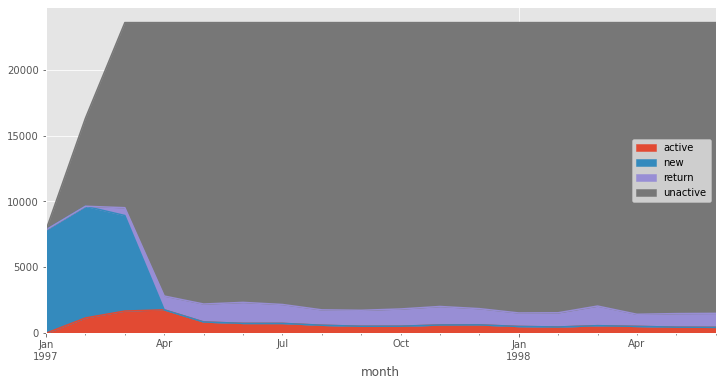

In [50]:
# 根据转秩的结果，画出用户分层面积图

purchase_stats_ct.T.plot(kind="area",figsize=(12,6))


#### 根据每月不同用户的计数统计做面积图：

- 前三个月用户人数不断增加，新增用户数量占比较大，活跃用户数量上升
- 1997年4月开始无新用户注册
- 1997年4月开始活跃用户数量下降，最后趋于稳定，回流用户趋于稳定水平,该两层的用户为消费主力，约2000人上下浮动
- 不活跃用户始终占大部分
- 注：回流用户为上月未消费，本月消费用户

In [51]:
purchase_stats_ct.fillna(0).T

,active,new,return,unactive
month,,,,
1997-01-01,0.0,7846.0,0.0,0.0
1997-02-01,1157.0,8476.0,0.0,6689.0
1997-03-01,1681.0,7248.0,595.0,14046.0
1997-04-01,1773.0,0.0,1049.0,20748.0
1997-05-01,852.0,0.0,1362.0,21356.0
1997-06-01,747.0,0.0,1592.0,21231.0
1997-07-01,746.0,0.0,1434.0,21390.0
1997-08-01,604.0,0.0,1168.0,21798.0
1997-09-01,528.0,0.0,1211.0,21831.0


In [52]:
# 算一下各种状态的占比：这个是错的，如果不加axis=1,就是算的是该数字在整个时间段（1997-01-01--1998-06-01）的占比，比如说
# new @ 1997-01-01的0.332就是7846/(7846+8476+7248）=0.33. 而这个显然不是我们要计算的【各种状态在每个月的占比】

#purchase_stats_ct.fillna(0).T.apply(lambda x:x/x.sum())

In [53]:

#这个是正确示范：# 算一下各种状态的占比：
purchase_rate_all=purchase_stats_ct.fillna(0).T.apply(lambda x:x/x.sum(),axis=1)
purchase_rate_all

,active,new,return,unactive
month,,,,
1997-01-01,0.000000,1.000000,0.000000,0.000000
1997-02-01,0.070886,0.519299,0.000000,0.409815
1997-03-01,0.071319,0.307510,0.025244,0.595927
1997-04-01,0.075223,0.000000,0.044506,0.880272
1997-05-01,0.036148,0.000000,0.057785,0.906067
1997-06-01,0.031693,0.000000,0.067543,0.900764
1997-07-01,0.031650,0.000000,0.060840,0.907510
1997-08-01,0.025626,0.000000,0.049555,0.924820
1997-09-01,0.022401,0.000000,0.051379,0.926220


In [54]:
purchase_rate_all[["unactive"]]

,unactive
month,
1997-01-01,0.000000
1997-02-01,0.409815
1997-03-01,0.595927
1997-04-01,0.880272
1997-05-01,0.906067
1997-06-01,0.900764
1997-07-01,0.907510
1997-08-01,0.924820
1997-09-01,0.926220


In [55]:
#如果想要drop unactive的部分

purchase_rate=purchase_stats_ct.fillna(0).T.drop(columns=["unactive"]).apply(lambda x:x/x.sum(),axis=1)
purchase_rate

,active,new,return
month,,,
1997-01-01,0.000000,1.000000,0.000000
1997-02-01,0.120108,0.879892,0.000000
1997-03-01,0.176501,0.761025,0.062474
1997-04-01,0.628278,0.000000,0.371722
1997-05-01,0.384824,0.000000,0.615176
1997-06-01,0.319367,0.000000,0.680633
1997-07-01,0.342202,0.000000,0.657798
1997-08-01,0.340858,0.000000,0.659142
1997-09-01,0.303623,0.000000,0.696377


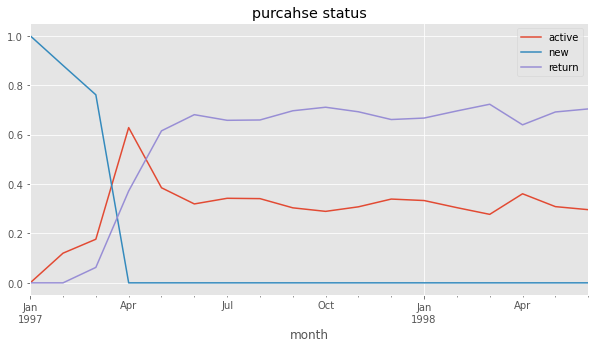

In [56]:
#画出active，new, return这些status的图

purchase_rate.plot(figsize=(10,5),title="purcahse status")

- 在消费用户中，4月后只存在活跃用户和回流用户进行消费
- 后期消费用户中，回流用户占比较大，整体消费用户质量一般

##  3.5用户购买周期（按订单）

### 3.5.1用户消费周期描述 (这次购买离上次购买的时间差）

In [57]:
#用户购买周期(按订单)

#计算用户相邻订单日期的差值,其中shift()函数是指将数据进行移动,默认axis=0
order_diff=grouped_user.apply(lambda x: x.order_dt-x.order_dt.shift())  
order_diff.head(10)

user_id   
1        0        NaT
2        1        NaT
         2     0 days
3        3        NaT
         4    87 days
         5     3 days
         6   227 days
         7    10 days
         8   184 days
4        9        NaT
Name: order_dt, dtype: timedelta64[ns]

In [58]:
order_diff=grouped_user.order_dt.apply(lambda x:x-x.shift())
#也可以用diff()函数
order_diff=grouped_user.order_dt.apply(lambda x:x.diff())
order_diff

0           NaT
1           NaT
2        0 days
3           NaT
4       87 days
          ...  
69654   11 days
69655   17 days
69656       NaT
69657       NaT
69658    1 days
Name: order_dt, Length: 69659, dtype: timedelta64[ns]

In [60]:
#计算用户相邻订单的差值做法Break down: 第一步：计算出用户相邻的订单，用shift()的方法移动，来

df["order_dt_shift"]=df.groupby("user_id").order_dt.shift()
df["order_dt_diff"]=df["order_dt"]-df["order_dt_shift"]
df["order_dt_diff"]   #由此可知得出的结果跟上面用shift()函数是一样的
df


,user_id,order_dt,order_product,order_amount,month,order_dt_shift,order_dt_diff
0,1,1997-01-01,1,11.77,1997-01-01,NaT,NaT
1,2,1997-01-12,1,12.00,1997-01-01,NaT,NaT
2,2,1997-01-12,5,77.00,1997-01-01,1997-01-12,0 days
3,3,1997-01-02,2,20.76,1997-01-01,NaT,NaT
4,3,1997-03-30,2,20.76,1997-03-01,1997-01-02,87 days
...,...,...,...,...,...,...,...
69654,23568,1997-04-05,4,83.74,1997-04-01,1997-03-25,11 days
69655,23568,1997-04-22,1,14.99,1997-04-01,1997-04-05,17 days
69656,23569,1997-03-25,2,25.74,1997-03-01,NaT,NaT
69657,23570,1997-03-25,3,51.12,1997-03-01,NaT,NaT


In [61]:
#来看看订单时间差的分布

order_diff.describe()


count                      46089
mean     68 days 23:22:13.567662
std      91 days 00:47:33.924168
min              0 days 00:00:00
25%             10 days 00:00:00
50%             31 days 00:00:00
75%             89 days 00:00:00
max            533 days 00:00:00
Name: order_dt, dtype: object

- 用户平均购买时间间隔为68天（可以根据品类进行分析是否合理）
- 用户购买周期中位数为31天，远小于平均值，数据为右偏分布，存在极大值干扰

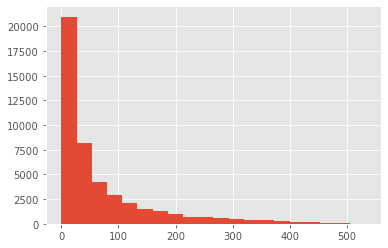

In [62]:
#消费间隔时间分布图
(order_diff/np.timedelta64(1,'D')).hist(bins=20)

- 平均购买周期为68天左右
- 大部分购买周期都在100天之内


## 3.6用户生命周期（按第一次&最后一次消费）


In [63]:
# 1. 先找出order_dt里面最大值和最小值

user_life=grouped_user.order_dt.agg(["max","min"])
user_life

,max,min
user_id,,
1,1997-01-01,1997-01-01
2,1997-01-12,1997-01-12
3,1998-05-28,1997-01-02
4,1997-12-12,1997-01-01
5,1998-01-03,1997-01-01
...,...,...
23566,1997-03-25,1997-03-25
23567,1997-03-25,1997-03-25
23568,1997-04-22,1997-03-25


In [64]:
 # 2.算出最大值和最小值的差

user_cycle=(user_life["max"]-user_life["min"])
user_cycle

user_id
1         0 days
2         0 days
3       511 days
4       345 days
5       367 days
          ...   
23566     0 days
23567     0 days
23568    28 days
23569     0 days
23570     1 days
Length: 23570, dtype: timedelta64[ns]

In [65]:
#3. 惯出user cycle的数据
user_cycle.describe()

count                       23570
mean     134 days 20:55:36.987696
std      180 days 13:46:43.039788
min               0 days 00:00:00
25%               0 days 00:00:00
50%               0 days 00:00:00
75%             294 days 00:00:00
max             544 days 00:00:00
dtype: object

- 用户平均生命周期为134天，中位数为0天，说明大部分用户仅消费一次就不再进行消费

### 用户生命周期分布图

Text(0, 0.5, 'people')

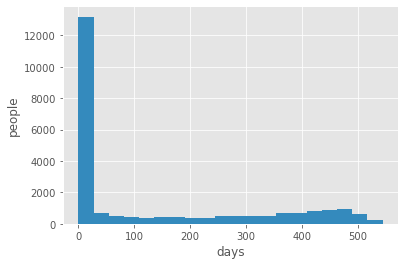

In [66]:
(user_cycle/np.timedelta64(1,"D")).hist(bins=20)
#也可以这么写，来去掉日期的单位
user_cycle.apply(lambda x:x.days).hist(bins=20)
plt.xlabel("days")
plt.ylabel("people")


由上图可见用户生命周期受只购买一次的用户影响很大,可以过滤生命周期为0的用户

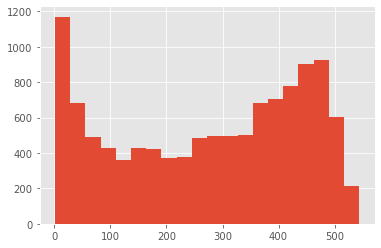

In [67]:
u_l = user_cycle/np.timedelta64(1,'D')
u_l[u_l>0].hist(bins=20)

#或者这样写:
#user_cycle.apply(lambda x:x.days)[user_cycle.apply(lambda x:x.days) >1].hist(bins=20)


总体呈现双峰趋势。可以看出除了只消费一次的用户，消费两次的用户也较多，这部分的用户消费意愿不强，需要不断开展优惠活动来培养客户习惯引导客户消费。集中在50天～300天的用户数量较稳定属于正常的用户生命周期。超过400天的用户是高质量用户生命周期，属于忠诚用户了，需继续通过运营维持好客户关系。

Text(0.5, 1.0, 'customer life time value distribution')

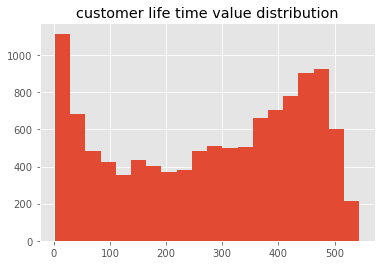

In [68]:
usertime_diff=grouped_user.order_dt.apply(lambda x:x.max()-x.min())
u_d=usertime_diff/np.timedelta64(1,"D")
u_d[u_d>1].hist(bins=20)
plt.title("customer life time value distribution")

## 用户消费指标

   ### 留存率
- 用户在第一次消费后，进行第二次消费的比率
### 流失率
- 未消费用户占比
### 复购率
- 自然月内，购买多次的用户占比
### 回购率
- 曾经购买过的用户在某一段时期内再次购买的占比

###  留存率

In [69]:
user_purchase=df[["user_id","order_product","order_amount","order_dt"]]
order_date_min=user_purchase.groupby("user_id").order_dt.min()
order_date_min

user_id
1       1997-01-01
2       1997-01-12
3       1997-01-02
4       1997-01-01
5       1997-01-01
           ...    
23566   1997-03-25
23567   1997-03-25
23568   1997-03-25
23569   1997-03-25
23570   1997-03-25
Name: order_dt, Length: 23570, dtype: datetime64[ns]

In [70]:
user_purchase_retention=pd.merge(user_purchase,order_date_min,on="user_id", how="left",suffixes=("","_min"))
user_purchase_retention

,user_id,order_product,order_amount,order_dt,order_dt_min
0,1,1,11.77,1997-01-01,1997-01-01
1,2,1,12.00,1997-01-12,1997-01-12
2,2,5,77.00,1997-01-12,1997-01-12
3,3,2,20.76,1997-01-02,1997-01-02
4,3,2,20.76,1997-03-30,1997-01-02
...,...,...,...,...,...
69654,23568,4,83.74,1997-04-05,1997-03-25
69655,23568,1,14.99,1997-04-22,1997-03-25
69656,23569,2,25.74,1997-03-25,1997-03-25
69657,23570,3,51.12,1997-03-25,1997-03-25


In [71]:
user_purchase_retention["dtdiff"]=user_purchase_retention.order_dt-user_purchase_retention.order_dt_min
user_purchase_retention  # 这里发现dtdiff后面有单位，所以要单位给去掉

user_purchase_retention["dtdiff"]=user_purchase_retention["dtdiff"].apply(lambda x:x.days)
user_purchase_retention

,user_id,order_product,order_amount,order_dt,order_dt_min,dtdiff
0,1,1,11.77,1997-01-01,1997-01-01,0
1,2,1,12.00,1997-01-12,1997-01-12,0
2,2,5,77.00,1997-01-12,1997-01-12,0
3,3,2,20.76,1997-01-02,1997-01-02,0
4,3,2,20.76,1997-03-30,1997-01-02,87
...,...,...,...,...,...,...
69654,23568,4,83.74,1997-04-05,1997-03-25,11
69655,23568,1,14.99,1997-04-22,1997-03-25,28
69656,23569,2,25.74,1997-03-25,1997-03-25,0
69657,23570,3,51.12,1997-03-25,1997-03-25,0


In [72]:
bins = [0,3,7,15,30,60,90,180,360,540]
user_purchase_retention['dtdiff_bin'] = pd.cut(user_purchase_retention.dtdiff, bins = bins)
user_purchase_retention


,user_id,order_product,order_amount,order_dt,order_dt_min,dtdiff,dtdiff_bin
0,1,1,11.77,1997-01-01,1997-01-01,0,NaN
1,2,1,12.00,1997-01-12,1997-01-12,0,NaN
2,2,5,77.00,1997-01-12,1997-01-12,0,NaN
3,3,2,20.76,1997-01-02,1997-01-02,0,NaN
4,3,2,20.76,1997-03-30,1997-01-02,87,"(60.0, 90.0]"
...,...,...,...,...,...,...,...
69654,23568,4,83.74,1997-04-05,1997-03-25,11,"(7.0, 15.0]"
69655,23568,1,14.99,1997-04-22,1997-03-25,28,"(15.0, 30.0]"
69656,23569,2,25.74,1997-03-25,1997-03-25,0,NaN
69657,23570,3,51.12,1997-03-25,1997-03-25,0,NaN


In [73]:
#用cut()函数来给dataframe分组，分成不同的bins(就是data range)

bins=[0,3,7,15,30,60,90,180,360,540]
user_purchase_retention["dtdiff_bin"]=pd.cut(user_purchase_retention.dtdiff,bins=bins)
user_purchase_retention

,user_id,order_product,order_amount,order_dt,order_dt_min,dtdiff,dtdiff_bin
0,1,1,11.77,1997-01-01,1997-01-01,0,NaN
1,2,1,12.00,1997-01-12,1997-01-12,0,NaN
2,2,5,77.00,1997-01-12,1997-01-12,0,NaN
3,3,2,20.76,1997-01-02,1997-01-02,0,NaN
4,3,2,20.76,1997-03-30,1997-01-02,87,"(60.0, 90.0]"
...,...,...,...,...,...,...,...
69654,23568,4,83.74,1997-04-05,1997-03-25,11,"(7.0, 15.0]"
69655,23568,1,14.99,1997-04-22,1997-03-25,28,"(15.0, 30.0]"
69656,23569,2,25.74,1997-03-25,1997-03-25,0,NaN
69657,23570,3,51.12,1997-03-25,1997-03-25,0,NaN


In [74]:
pivoted_retention=user_purchase_retention.pivot_table(index="user_id",
                                                      columns="dtdiff_bin",
                                                      values="order_dt",
                                                      aggfunc="count",
                                                      )

pivoted_retention

dtdiff_bin,"(0, 3]","(3, 7]","(7, 15]","(15, 30]","(30, 60]","(60, 90]","(90, 180]","(180, 360]","(360, 540]"
user_id,,,,,,,,,
3,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,1.0
4,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2.0,NaN
5,NaN,NaN,1.0,NaN,1.0,NaN,3.0,4.0,1.0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
8,NaN,NaN,NaN,NaN,1.0,NaN,1.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...
23561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
23563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
23564,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN


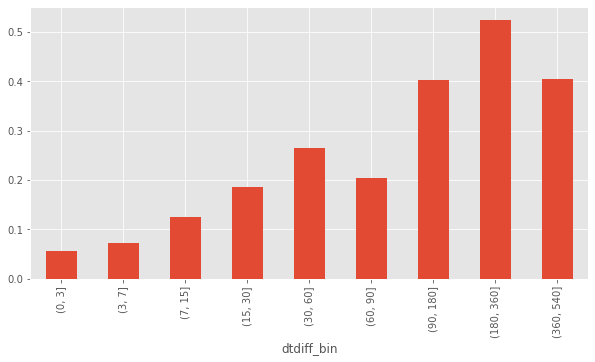

In [75]:
# 画出柱状图

pivoted_retention.applymap(lambda x:1 if x>0 else 0).mean().plot(kind="bar",figsize=(10,5))

### 流失率( 未消费的客户占比）

In [76]:
lost_rate=purchase_stats_ct.T.fillna(0).apply(lambda x:x/x.sum(),axis=1)[["unactive"]]
lost_rate

,unactive
month,
1997-01-01,0.000000
1997-02-01,0.409815
1997-03-01,0.595927
1997-04-01,0.880272
1997-05-01,0.906067
1997-06-01,0.900764
1997-07-01,0.907510
1997-08-01,0.924820
1997-09-01,0.926220


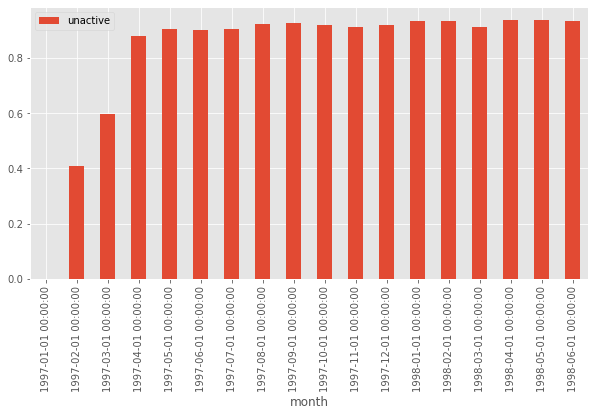

In [77]:
#画图
lost_rate.plot.bar(figsize=(10,5))

### 复购率
自然月内，购买多次的用户占比

In [78]:
pivoted_counts

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23567,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23568,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
purchase_r=pivoted_counts.applymap(lambda x:1 if x>1 else np.NaN if x== 0 else 0)
purchase_r

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23567,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23568,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


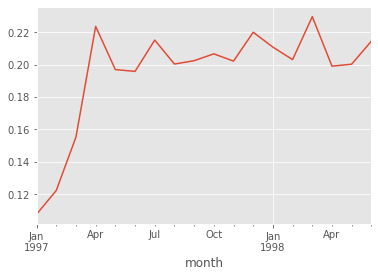

In [80]:
(purchase_r.sum()/purchase_r.count()).plot()

后期复购率稳定在20%左右，前三个月有大量用户涌入，而这批用户多只购买一次，所以复购率较低


In [81]:
repurchase=grouped_user.month.count()
repurchase

user_id
1         1
2         2
3         6
4         4
5        11
         ..
23566     1
23567     1
23568     3
23569     1
23570     2
Name: month, Length: 23570, dtype: int64

In [82]:
# 过滤出在一个月内购买超过一次的客户

repurchase[repurchase>1].count()/repurchase.count()

0.4947815019092066

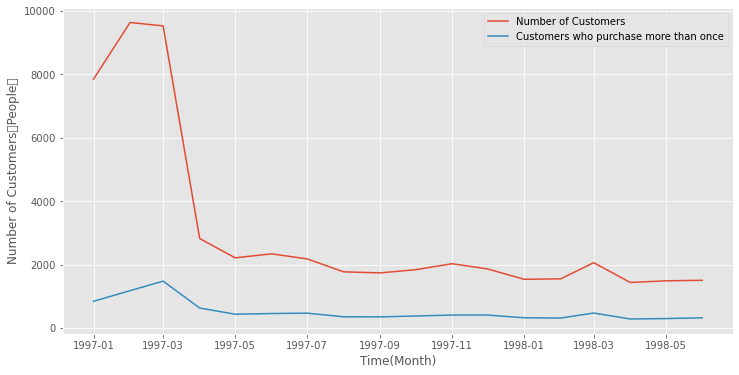

In [84]:
plt.figure(figsize=(12,6))
plt.plot(purchase_r.count())
plt.plot(purchase_r.sum())

plt.xlabel('Time(Month)') 
plt.ylabel('Number of Customers（People）') 
plt.legend(['Number of Customers', 'Customers who purchase more than once'])
plt.show()

### 回购率
- 曾经购买过的用户在某一时期内的再次购买的占比

In [88]:
df_purchase.head()

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0


In [90]:
#定义一个函数，将消费两次以上记为1，消费一次记为0，没有消费记为空值：

def purchse_back(data):
    status = []
    for i in range(17):
        if data[i] == 1:
            if data[i+1] ==1:
                status.append(1)
            else:
                status.append(0)
        else:
            status.append(np.NaN)
    status.append(np.NaN)  # 最后一个月份因为没人跟它对比，所以直接赋值空值：np.NaN
    return status

In [92]:
purchase_b = df_purchase.apply(purchse_back,axis=1,raw=True)
purchase_b

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,1.0,1.0,1.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23567,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23568,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


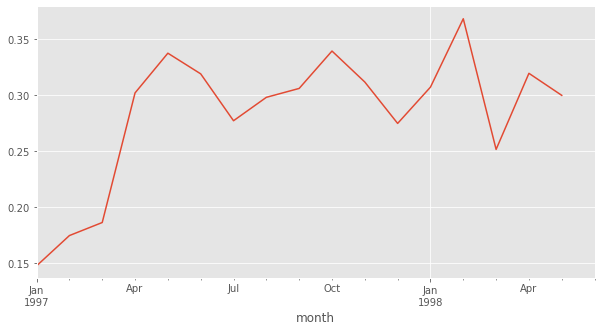

In [95]:
# 计算复购率：
# 注意：sum()计算的是非0值的总和，count()计算的是非0值和0值的总个数，排除np.NaN
(purchase_b.sum()/purchase_b.count()).plot(figsize=(10,5))

- 前三个月因为有大量的新用户涌入，但是超过一半的人只消费了一次，所以前三个月回购率比较低.说明了对于新用户，在其第一次消费后的三个月内是一段重要的时期，需要营销策略积极引导其再次消费及持续消费
- 后续月份用户人数比较稳定，回购率也比较稳定，稳定在30%左右，即当月消费人数中有30%左右的用户会在下一个月再次消费.对于老客，也要适时推出反馈老客户的优惠活动，以加强老客的忠诚度


C:\Users\cryst\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 65288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\cryst\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 65289 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\cryst\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 65288 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\cryst\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 65289 missing from current font.
  font.set_text(s, 0, flags=flags)


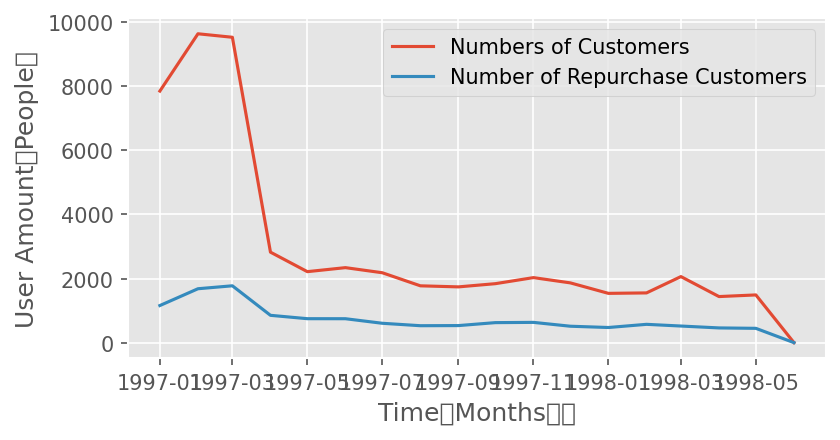

In [96]:
plt.figure(figsize=(6,3),dpi=150)
plt.plot(purchase_b.count())
plt.plot(purchase_b.sum())
plt.xlabel('Time（Months））') 
plt.ylabel('User Amount（People）') 
plt.legend(['Numbers of Customers', 'Number of Repurchase Customers'])
plt.show()

- 消费人数从三月份开始，因为没有新用户进入，出现断崖式下跌
- 而回购人数先缓慢增长，从四月份开始逐渐下降并稳定在500左右